# ROUND 2

In [315]:
import pandas as pd

In [316]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [317]:
# 1. Show the dataframe shape.

data.shape

(10910, 26)

In [318]:
#2. Standardize header names.

# Let's look at the data first

data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [319]:
# Let's look at the list of column names
display(data.columns)

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [320]:
# I notice one column in which both words are not separated by a space
data = data.rename(columns={'EmploymentStatus': 'Employment Status'})

In [321]:
# Check it worked
display(data.columns)

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'Employment Status', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [322]:
# Let's remove the probably useless "old" index numbers in of the first unnammed column
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [323]:
#3. Which columns are numerical?

# Let's look at all data types
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
Employment Status                 object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Vehicle Type    

In [324]:
# Let's isolate the numeric ones
data._get_numeric_data()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [325]:
#4. Which columns are categorical?

data.select_dtypes(['object'])

,Customer,State,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [326]:
#5. Check and deal with NaN values.

# Let's first count the NaN in each column

data.isna().sum()

Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
Employment Status                   0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [327]:
# I'll start with the 'Vehicle Type', as this is clearly the most problematic with roughly 50% of NaN
# Let's find out what the other values are.

data['Vehicle Type'].value_counts(dropna=False)

NaN    5482
A      5428
Name: Vehicle Type, dtype: int64

In [328]:
# The column 'Vehicle Type' only shows one value ('A') other than NaN. We can guess that the type is "A" or "not A"
# Without knowing what 'A' stands for, we could thus :
# 1 - or put A everywhere --> but the column then becomes useless as it would not bring any added value
# 2 - replace the NaN by any other value ('Not A' for example) without losing any data or granularity
# 3 - just leave the NaN be
# I will go for the option 2, not knowing if keeping NaN is a problem in itself.
data['Vehicle Type'] = data['Vehicle Type'].fillna('Not A')

In [329]:
# Let's check
data['Vehicle Type'].value_counts(dropna=False)

Not A    5482
A        5428
Name: Vehicle Type, dtype: int64

In [330]:
# Let's handle the other categorical columns
data['State'].value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: State, dtype: int64

In [331]:
# There are 5 different states in the data set, ranging from 888 to 3552 occurrences.
# Adding our 631 NaN to one state would thus have a very significant impact

# I notice that for all columns, the number of NaN is similar (slightly above 600 occurrences).
# Let's try to see if  there is a pattern in the missing data (are the NaN in each column on the exact same rows ?)
# If that was the case, we could just drop those rows for which the quality is too poor.
# I make an extraction of the 631 rows with no state filled-in and look at the number of NaN in the other columns

state_unknown = data[data['State'].isna()].copy()
state_unknown.isna().sum()

Customer                           0
State                            631
Customer Lifetime Value            0
Response                         631
Coverage                           0
Education                          0
Effective To Date                  0
Employment Status                  0
Gender                             0
Income                             0
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim           42
Months Since Policy Inception      0
Number of Open Complaints         42
Number of Policies                 0
Policy Type                        0
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount                 0
Vehicle Class                     31
Vehicle Size                      31
Vehicle Type                       0
dtype: int64

In [332]:
# we see that those 631 rows without state are the same as the ones without response
# but most of them have data in the other columns
# we need to dig further and handle NaN's column by column

In [333]:
data['Response'].value_counts(dropna=False)

No     8813
Yes    1466
NaN     631
Name: Response, dtype: int64

In [334]:
# for the state and response, let's create an 'unknown' status
data['State'] = data['State'].fillna('Unknown')
data['Response'] = data['Response'].fillna('Unknown')
data['State'].value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Unknown        631
Name: State, dtype: int64

In [335]:
# Let's look at the rest of the categorical columns
# Vehicle Size

In [336]:
data['Vehicle Size'].value_counts(dropna=False)

Medsize    7251
Small      1966
Large      1071
NaN         622
Name: Vehicle Size, dtype: int64

In [337]:
# more than 70% of the vehicles are of medium size. changing the NaN in this column to that category might not affect
# the result too much, but let's dig further first.

In [338]:
veh_size_unknown = data[data['Vehicle Size'].isna()].copy()
veh_size_unknown.isna().sum()

Customer                           0
State                              0
Customer Lifetime Value            0
Response                           0
Coverage                           0
Education                          0
Effective To Date                  0
Employment Status                  0
Gender                             0
Income                             0
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim           42
Months Since Policy Inception      0
Number of Open Complaints         42
Number of Policies                 0
Policy Type                        0
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount                 0
Vehicle Class                    622
Vehicle Size                     622
Vehicle Type                       0
dtype: int64

In [339]:
# we see that the 622 rows with missing vehicle size are exactly the same as the 622 rows where the vehicle class is missing
# let's do the same as for vehicle type and create an uknown status for those columns
data['Vehicle Class'] = data['Vehicle Class'].fillna('Unknown')
data['Vehicle Size'] = data['Vehicle Size'].fillna('Unknown')
data['Vehicle Class'].value_counts(dropna=False)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
Unknown           622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: Vehicle Class, dtype: int64

In [340]:
# Let's check that we no longer have NaN inthe cleaned columns
data.isna().sum()

Customer                           0
State                              0
Customer Lifetime Value            0
Response                           0
Coverage                           0
Education                          0
Effective To Date                  0
Employment Status                  0
Gender                             0
Income                             0
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim          633
Months Since Policy Inception      0
Number of Open Complaints        633
Number of Policies                 0
Policy Type                        0
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount                 0
Vehicle Class                      0
Vehicle Size                       0
Vehicle Type                       0
dtype: int64

In [341]:
# let's tackle the numerical columns now.
# They both have the same number of rows, so let's check if they are the same rows
figures_unknown = data[data['Months Since Last Claim'].isna()].copy()
figures_unknown.isna().sum()

Customer                           0
State                              0
Customer Lifetime Value            0
Response                           0
Coverage                           0
Education                          0
Effective To Date                  0
Employment Status                  0
Gender                             0
Income                             0
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim          633
Months Since Policy Inception      0
Number of Open Complaints        633
Number of Policies                 0
Policy Type                        0
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount                 0
Vehicle Class                      0
Vehicle Size                       0
Vehicle Type                       0
dtype: int64

In [342]:
# indeed they are the same
# Can it be that a customer who never filed any complaints would have NaN in this column ?
# Let's check if those customers have claimed amounts
figures_unknown['Total Claim Amount'].value_counts(dropna=False)

350.400000     11
307.200000     10
312.000000      8
331.200000      8
292.800000      7
               ..
425.527151      1
902.400000      1
576.000000      1
243.598068      1
1214.400000     1
Name: Total Claim Amount, Length: 442, dtype: int64

In [343]:
# They do have claimed amounts, so it is just a matter of poor data quality

In [344]:
# FOLLOWING our discussion I'll stop there with the NaN and just drop them...
# Actually let's take this as an exercise and drop the rows with 'unknown' statuses that I have created.
# for the vehicle type, we saw that we have roughly 50% of the data missing, so we can drop the whole column.
data = data.drop(['Vehicle Type'], axis=1)


In [345]:

# For the rest of the columns, the NaN represent 5 to 6% of the rows and we will not lose too much info if we drop them.
# I just have to drop the 'unknown' now, that I have already replaced the NaN.

data = data.drop(data[data['Vehicle Class'] == 'Unkown'].index)

In [346]:
# Let's check if it worked
data['Vehicle Class'].value_counts(dropna=False)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
Unknown           622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: Vehicle Class, dtype: int64

In [347]:
# No it did not ...
# Let's try it another way
data = data[data['Vehicle Class'] != 'Unknown']
data['Vehicle Class'].value_counts(dropna=False)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: Vehicle Class, dtype: int64

In [348]:
# Yipie !
# Actually, trying this different way made me realize that the issue above is simply a typo : 'Unkown' instead of 'Unknown'
# with the right word, it would have worked
# but the new way is simpler and neat

In [349]:
data = data[data['State'] != 'Unknown']
data['State'].value_counts(dropna=False)

California    3344
Oregon        2747
Arizona       1815
Nevada         933
Washington     849
Name: State, dtype: int64

In [350]:
# Let's check where we still have NaN
data.isna().sum()

Customer                           0
State                              0
Customer Lifetime Value            0
Response                           0
Coverage                           0
Education                          0
Effective To Date                  0
Employment Status                  0
Gender                             0
Income                             0
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim          554
Months Since Policy Inception      0
Number of Open Complaints        554
Number of Policies                 0
Policy Type                        0
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount                 0
Vehicle Class                      0
Vehicle Size                       0
dtype: int64

In [351]:
data = data.dropna()

In [352]:
data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
Employment Status                0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [353]:
# where are we now ?
data.shape

(9134, 24)

In [354]:

# 6. DATETIME FORMAT

# we only have one column with dates, 'Effective To Date'
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'], errors='coerce')

In [355]:
data.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
Employment Status                        object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                 float64
Months Since Policy Inception             int64
Number of Open Complaints               float64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [356]:
data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
Employment Status                0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [357]:
# it seems to have worked, type of the column is now datetime and there is no NaN either

In [358]:
data['Effective To Month'] = list(map(lambda x: x.month, data['Effective To Date']))

In [359]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective To Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2


In [360]:
data['Effective To Month'].value_counts(dropna=False)

1    4898
2    4236
Name: Effective To Month, dtype: int64

In [361]:
# All contracts seem to be from January or February so filtering is not necessary but let's do it anyway for the sake of it
data_Q1 = data[data['Effective To Month'] <=3 ]

In [362]:
data_Q1.shape

(9134, 25)

In [363]:
data.shape

(9134, 25)

In [364]:
# indeed, both dataframes have the same shape.

#### Bonus of Round 2 - cleaning function

In [365]:
def round2_cleaning(input_data):
    
    # create a copy of the original dataset, to avoid changing the raw data
    output_data = input_data.copy()

    # harmonize feaders
    output_data = output_data.rename(columns={'EmploymentStatus': 'Employment Status'})
    
    # delete useless data
    output_data = output_data.drop(['Unnamed: 0', 'Vehicle Type'], axis=1)
    output_data = output_data.dropna()
    
    # change format of the date and add the extra column with the month
    output_data['Effective To Date'] = pd.to_datetime(output_data['Effective To Date'], errors='coerce')
    output_data['Effective To Month'] = input_data['Effective To Date'].apply(lambda x: x.month)
    
    # filter the data
    output_data = dataframe[dataframe['Effective To Month'] <=3 ]
    
    # output of the function
    return output_data

# ROUND 3

## 1. Show DataFrame info

In [366]:
# 1. Show dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer Lifetime Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   Employment Status              9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   object        
 11  Marital Status  

In [367]:
# We see that our data set has the 25 expected columns and they have the expected data types.
# There is also no null cell, so the data seems clean
# The only thing we might need to do is reset the index, as we have 9134 rows, but the index goes up to 10908

In [368]:
data = data.reset_index(drop=True)

## 2. Describe DataFrame

In [369]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Effective To Month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [370]:
# The describe() methode gives us the summary of the numerical columns.
# For all the columns, I notice that the standard deviation seems pretty high versus the values of the mean.
# We might have "extreme" outliers that affect the mean or a wide dispersion of the data.

## 3. Show a plot of the total number of responses

In [371]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [372]:
data['Response'].value_counts(dropna=False)

No     7826
Yes    1308
Name: Response, dtype: int64

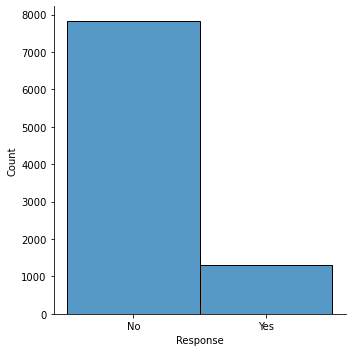

In [373]:
# Response is not a value but a simple 'yes' or 'no' info.
# to show the number of occurrences for each value, we new a distribution chart.
sns.displot(data['Response'])
plt.show()

## 4. Show a plot of the response rate by the sales channel

In [374]:
# Strategy : we need to consolidate somehow the number of responses with 'yes' and divide it by the total number of
# occurrences for each of the sales channel.

In [375]:
# Let's start by creating a list of the unique sales channels
# sales_channels = data['Sales Channel'].unique()
sales_channels = list(set(data['Sales Channel']))
sales_channels

['Agent', 'Web', 'Branch', 'Call Center']

In [376]:
# Let's see how we can calculate the number of responses for each value Yes or No
# subset_data = data[['Sales Channel', 'Response']].copy()
# yesses = subset_data.loc[subset_data['Response']=='Yes'].count()
# nos = subset_data.loc[subset_data['Response']=='No'].count()

In [377]:
# Seems to work. Let's put it in a loop to find the rates for each sales channel
# I first create an empty list in which I will append the results
# response_rates = []
# for channel in sales_channels:
#     yesses = subset_data.loc[(subset_data['Response']=='Yes') & (subset_data['Sales Channel'] == channel )].count()
#     total_reponses = subset_data.loc[subset_data['Sales Channel']== channel].count()
#     response_rates.append( yesses / total_reponses)
# print(response_rates)

In [378]:
# I am stuck with that logic, and will try something else.
# Let's create an extra column in our data set and fill in 1 where reponse=yes and 0 otherwise
# this way, we can maybe groupby sales channel, once by summing (will give number of yes) once by counting (will give total responses)

data['Response Num'] = data['Response'].apply(lambda x: 1 if x =='Yes' else 0)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective To Month,Response Num
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2,0
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1,1
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2,0


In [379]:
response_rates = []
for x in sales_channels:
    subset_channel = data[data['Sales Channel'] == x ].copy()
    rate_channel = subset_channel['Response Num'].sum()/subset_channel['Response Num'].count()
    response_rates.append(rate_channel)
print(response_rates)

[0.1915444348576359, 0.11773584905660377, 0.11453058044409817, 0.10878186968838527]


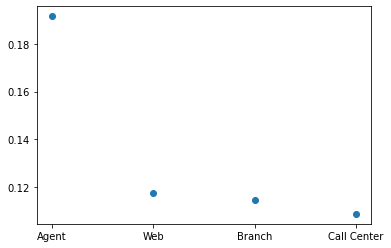

In [380]:
plt.scatter(sales_channels, response_rates)
plt.show()

## 5. Show a plot of the response rate by the total claim amount

In [381]:
# To apply the same logic as for the previous one, I need to create bins for the claim amount
# we see in the dataframe description that the claim amounts ranges from roughly 0 to almost 3000.
# I will create bins by steps of 500

bins_claim_amount = [0, 500, 1000, 1500, 2000, 2500, 3000]
data['Claim Amount Binned'] = pd.cut(data['Total Claim Amount'], bins_claim_amount)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective To Month,Response Num,Claim Amount Binned
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2,0,"(0, 500]"
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1,0,"(500, 1000]"
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2,0,"(0, 500]"
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1,1,"(0, 500]"
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2,0,"(0, 500]"


In [385]:
# create a list of bins
bins_claim_list = list(set(data['Claim Amount Binned']))

In [386]:
response_rates_2 = []
for y in bins_claim_list :
    subset_claim_bin = data[data['Claim Amount Binned'] == y ].copy()
    rate_claim_bin = subset_claim_bin['Response Num'].sum()/subset_channel['Response Num'].count()
    response_rates_2.append(rate_claim_bin)
print(response_rates_2)

[0.4827195467422096, 0.22436260623229462, 0.0, 0.0339943342776204, 0.0, 0.0]


In [387]:
bins_claim_list

[Interval(0, 500, closed='right'),
 Interval(500, 1000, closed='right'),
 Interval(2000, 2500, closed='right'),
 Interval(1000, 1500, closed='right'),
 Interval(2500, 3000, closed='right'),
 Interval(1500, 2000, closed='right')]

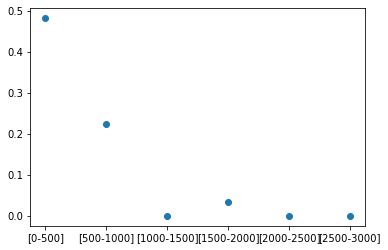

In [388]:
# Make the list of bins more readable
bins_claim_list = ['[0-500]','[500-1000]','[1000-1500]','[1500-2000]','[2000-2500]','[2500-3000]']

# Make the chart
plt.scatter(bins_claim_list, response_rates_2)
plt.show()

## 6. Show a plot of the response rate by income

ValueError: x and y must be the same size

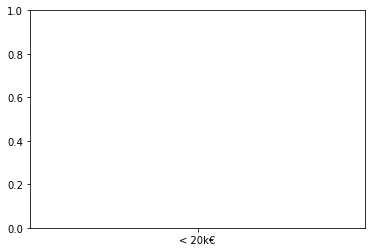

In [397]:
# we see in the dataframe description that the income ranges from 0 to almost 100.000.
# I will create bins by steps of 20.000

bins_income = [0, 20000, 40000, 60000, 80000, 100000]
data['Income Binned'] = pd.cut(data['Income'], bins_income)
bins_income_list = list(set(data['Income Binned']))

response_rates_3 = []
for z in bins_income_list :
    subset_income_bin = data[data['Income Binned'] == z ].copy()
    rate_income_bin = subset_income_bin['Response Num'].sum()/subset_channel['Response Num'].count()
    response_rates_3.append(rate_income_bin)
 
bins_income_list = ['< 20k€','20k€-40k€','40k€-60k€','60k€-80k€', '>80k€']
plt.scatter(bins_income_list, response_rates_3)
plt.show()

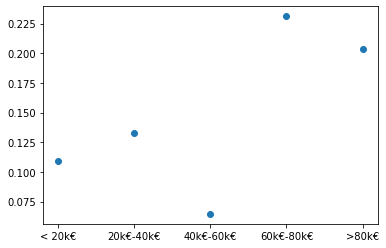

In [398]:
# I looked into it and the error comes from the income at 0 that return NaN in my bins
# correction

bins_income = [-1, 20000, 40000, 60000, 80000, 100000]
data['Income Binned'] = pd.cut(data['Income'], bins_income)
bins_income_list = list(set(data['Income Binned']))

response_rates_3 = []
for z in bins_income_list :
    subset_income_bin = data[data['Income Binned'] == z ].copy()
    rate_income_bin = subset_income_bin['Response Num'].sum()/subset_channel['Response Num'].count()
    response_rates_3.append(rate_income_bin)
    
bins_income_list = ['< 20k€','20k€-40k€','40k€-60k€','60k€-80k€', '>80k€']
plt.scatter(bins_income_list, response_rates_3)
plt.show()